req         WARNING 	DEFAULT CACHE ENABLED! (3.07 GB) C:\Users\dilau\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '1

DRS activation points for HAM on lap 18:
Series([], Name: DRS, dtype: int64)


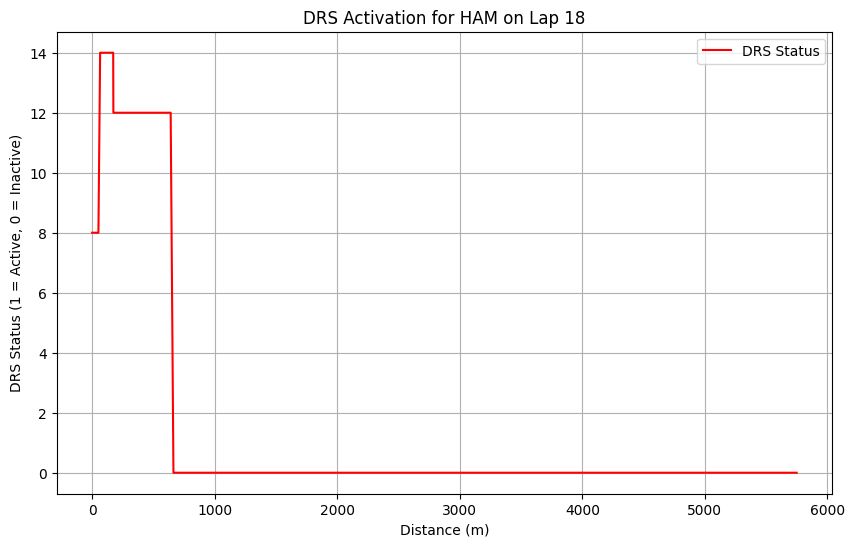

DRS activation zones for HAM on lap 18:


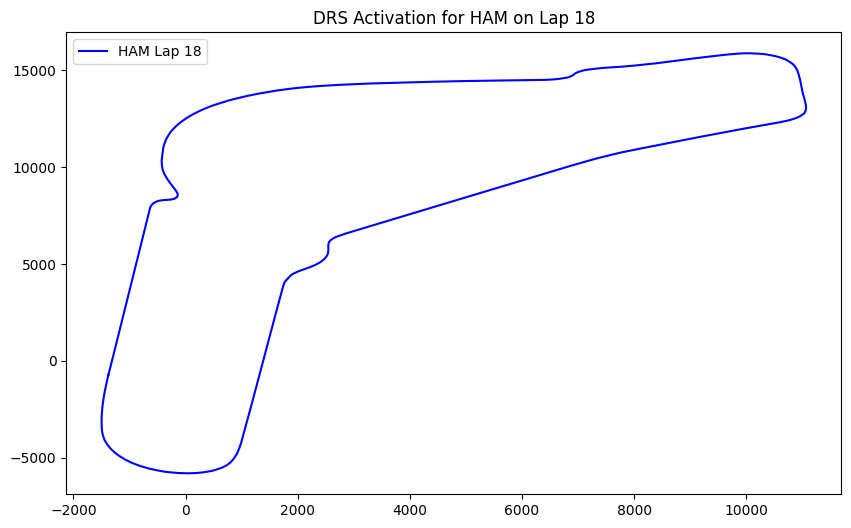

In [1]:
# Import required libraries
import fastf1  # Library for F1 data analysis
import matplotlib.pyplot as plt  # Library for plotting

# Enable cache (optional) - Can speed up subsequent data loading
# fastf1.Cache.enable_cache('cache')

# Define session parameters
year = 2024  # Year of the race
gran_prix = "Monza"  # Name of the Grand Prix
sessionG = 'R'  # Session type (R for Race)
driver = "HAM"  # Driver code (Hamilton)
lap_number = 18  # Specific lap to analyze

# Load the race session data
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()

# Extract specific lap data for the chosen driver
lap = session.laps.pick_driver(driver).pick_lap(lap_number).iloc[0]

# Get detailed telemetry data for the selected lap
telemetry = lap.get_telemetry()

# Extract DRS (Drag Reduction System) status from telemetry
drs_status = telemetry["DRS"]

# Print timestamps when DRS was activated (DRS status = 1)
print(f"DRS activation points for {driver} on lap {lap_number}:")
print(drs_status[drs_status == 1])

# Create first plot: DRS activation vs Distance
plt.figure(figsize=(10, 6))
plt.plot(telemetry["Distance"], drs_status, label="DRS Status", color="red")
plt.xlabel("Distance (m)")
plt.ylabel("DRS Status (1 = Active, 0 = Inactive)")
plt.title(f"DRS Activation for {driver} on Lap {lap_number}")
plt.legend()
plt.grid()
plt.show()

# Filter telemetry data to show only when DRS is active
drs_zones = telemetry[telemetry["DRS"] == 1]

# Analyze and print DRS activation zones
print(f"DRS activation zones for {driver} on lap {lap_number}:")
# Group consecutive DRS activations and calculate their distances
for zone in drs_zones.groupby((drs_zones.index.to_series().diff() > 1).cumsum()):
    start_distance = zone[1]["Distance"].min()
    end_distance = zone[1]["Distance"].max()
    print(f"Zone: {start_distance:.0f}m to {end_distance:.0f}m")

# Create second plot: Track layout with DRS zones
fig, ax = plt.subplots(figsize=(10, 6))

# Plot complete lap trajectory
ax.plot(telemetry["X"], telemetry["Y"], label=f"{driver} Lap {lap_number}", color="blue")

# Highlight DRS activation zones on the track layout
for zone in drs_zones.groupby((drs_zones.index.to_series().diff() > 1).cumsum()):
    start_idx = zone[1].index[0]
    end_idx = zone[1].index[-1]
    ax.plot(telemetry.loc[start_idx:end_idx, "X"], telemetry.loc[start_idx:end_idx, "Y"], 
            color="red", linewidth=3, label="DRS Zone")

plt.title(f"DRS Activation for {driver} on Lap {lap_number}")
plt.legend()
plt.show()